# The Spark Foundation : GRIP

## Author : Mohamed Gamal


## Task1

### Student Score Prediction (linear Regression Model)


**- In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.**

**- What will be the predict score if a student studies for 9.25 hrs/day?**

In [1]:
#import libraries
import numpy as np                                                      #for fast operations on arrays    
import pandas as pd                                                     #for read & manipulate dataset
import matplotlib.pyplot as plt                                         #for Data visualization
from sklearn.model_selection import train_test_split                    #for split dataset to training set and test set 
from sklearn.linear_model import LinearRegression                       #Regression Model     
from sklearn.metrics import r2_score                                    #Evaluation Model Performance
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Read dataset
df = pd.read_csv('student_scores.csv')

## Exploratory Data Analysis

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Shape of Dataset
print("Number of rows : {}".format(df.shape[0]))

Number of rows : 25


In [5]:
#Check Missing Values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(2)

,Total,Percent
Scores,0,0.0
Hours,0,0.0


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


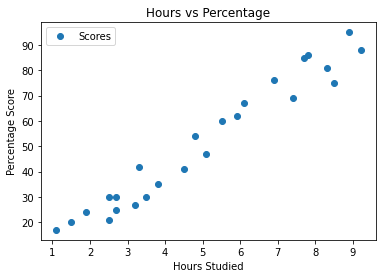

In [7]:
# visualize Dataset
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score

## Prepare Data

In [8]:
# Split Dataset to input & output
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

In [9]:
# Split data to 80% training set & 20% testset 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

## Train Model

In [10]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

## Make Predictions

In [11]:
# Predicting the scores
y_pred = regressor.predict(X_test)

## Plot Model Output

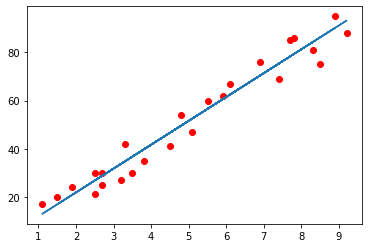

In [12]:
#visualize Data
plt.scatter(X,y,c='red')

#visualize Model
line = regressor.coef_*X+regressor.intercept_

plt.plot(X, line)

## Evaluating the model

In [13]:
r2 = r2_score(y_test,y_pred)
print("Model Accuracy : {}".format(r2))

Model Accuracy : 0.9454906892105356


What will be the predict score if a student studies for 9.25 hrs/day?

In [14]:
hours = 9.25
own_pred = regressor.predict(np.asarray(hours).reshape(1, -1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538
